In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import seaborn as sns; sns.set()
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

C:\Users\mattg\AppData\Local\Temp\ipykernel_44180\984135291.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [23]:
cancer = pd.read_csv('breast-cancer.csv')
display(cancer)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
1134,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
1135,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
1136,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [28]:
X = cancer.drop('diagnosis', axis=1)  # Features
y_label = cancer['diagnosis']

mms = MinMaxScaler()
X_minmax = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y_label, train_size=0.7, stratify=y_label, random_state=0)

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

#n_estimators = 10 is the default
#max_samples = 0.8 means that each bootstrap sample will be 80% of the size of your training set
#max_features = 0.5 means that each bootstrap sample will choose only 50% of your available features for each base classifier

parameters = {'n_neighbors':[1, 5, 7, 11]} #set parameters for GridSearch
knn = KNeighborsClassifier() #create your SVM object
GSKNN = GridSearchCV(knn, parameters)
GSKNN.fit(X_train, y_train)
print(GSKNN.best_estimator_) 

parameters2 = {'n_estimators':[1,10,25],'max_samples':[.6,.7,.8,.9],'max_features':[.25,.5,.75]}
BC = BaggingClassifier(estimator = GSKNN, oob_score=True) 
BCGS = GridSearchCV(BC, parameters2)
BCGS.fit(X_train, y_train)
y_pred =BCGS.predict(X_test)
print(BCGS.best_params_) 

KNeighborsClassifier(n_neighbors=11)
{'max_features': 0.25, 'max_samples': 0.8, 'n_estimators': 25}


0.9748743718592965 OOB
0.9912280701754386 Accuracy
0.9912209105984425 F1


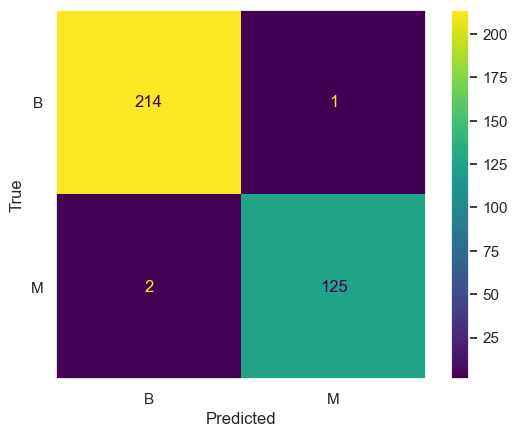

In [49]:
BC = BaggingClassifier(estimator = GSKNN, n_estimators = 10, max_samples = 0.7, max_features = 0.75, oob_score=True)
BC.fit(X_train, y_train)
y_pred =BC.predict(X_test)

print(BC.oob_score_, "OOB")
print(accuracy_score(y_test,y_pred),"Accuracy")
print(f1_score(y_test, y_pred, average="weighted"),"F1")
cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
cmd.ax_.grid(False)

In [51]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':[1, 5, 7, 11]} #set parameters for GridSearch
DT =  DecisionTreeClassifier() #create your SVM object
GSDT = GridSearchCV(DT, parameters)
GSDT.fit(X_train, y_train)
print(GSDT.best_params_) 


parameters2 = {'n_estimators':[1,10,25],'max_samples':[.7,.8],'max_features':[.25,.5,.75]}
BC2 = BaggingClassifier(estimator = GSDT, oob_score=True) 
BC2GS = GridSearchCV(BC2, parameters2)
BC2GS.fit(X_train, y_train)
y_pred =BC2GS.predict(X_test)
print(BC2GS.best_params_) 

{'max_depth': 7}
{'max_features': 0.5, 'max_samples': 0.8, 'n_estimators': 10}


DecisionTreeClassifier(max_depth=11)
0.9723618090452262 OOB
0.9736842105263158 Accuracy
0.9737453604029849 F1


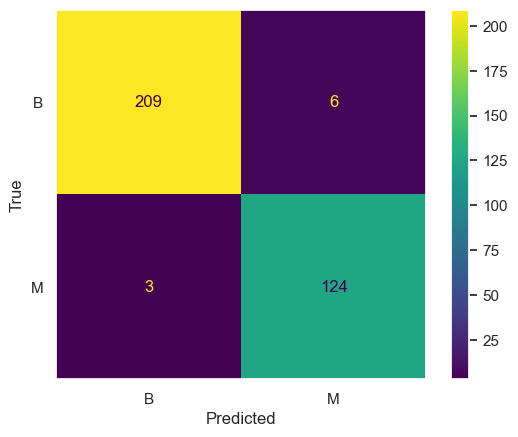

In [37]:
BC2 = BaggingClassifier(estimator = GSDT, n_estimators = 10, max_samples = 0.8, max_features = 0.5, oob_score=True) #Note: the default classifier is DecisionTreeClassifier
BC2.fit(X_train, y_train)
y_pred =BC2.predict(X_test)


print(BC2.oob_score_, "OOB")
print(accuracy_score(y_test,y_pred),"Accuracy")
print(f1_score(y_test, y_pred, average="weighted"),"F1")
cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
cmd.ax_.grid(False)

{'C': 3, 'kernel': 'rbf'}
0.9786432160804021 OOB
0.9853801169590644 Accuracy
0.985317353301085 F1


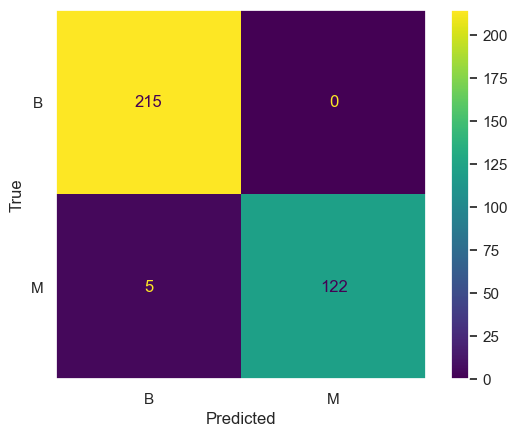

In [42]:
parameters = {'C':[1, 3, 5, 7],'kernel':('linear', 'rbf', 'poly')}#set parameters for GridSearch
svc =  SVC() #create your SVM object
GSSVC = GridSearchCV(svc, parameters)
GSSVC.fit(X_train, y_train)
print(GSSVC.best_params_)


BC3 = BaggingClassifier(estimator = GSSVC, n_estimators = 10, max_samples = 0.8, max_features = 0.5, oob_score=True) #Note: the default classifier is DecisionTreeClassifier
BC3.fit(X_train, y_train)
y_pred =BC3.predict(X_test)


print(BC3.oob_score_, "OOB")
print(accuracy_score(y_test,y_pred),"Accuracy")
print(f1_score(y_test, y_pred, average="weighted"),"F1")
cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
cmd.ax_.grid(False)

0.9484924623115578 OOB
0.9210526315789473 Accuracy
0.9211154170906493 F1


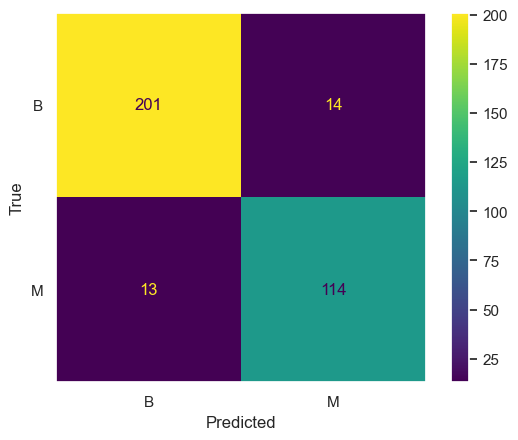

In [44]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
BC4 = BaggingClassifier(estimator = GNB, n_estimators = 10, max_samples = 0.8, max_features = 0.5, oob_score=True) #Note: the default classifier is DecisionTreeClassifier
BC4.fit(X_train, y_train)
y_pred =BC4.predict(X_test)


print(BC4.oob_score_, "OOB")
print(accuracy_score(y_test,y_pred),"Accuracy")
print(f1_score(y_test, y_pred, average="weighted"),"F1")
cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
cmd.ax_.grid(False)